In [45]:
!pip install imbalanced-learn

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [20]:
# loading data

cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('Data/magic04.data', names=cols)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [21]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [22]:
# converting the class values to numbers i.e. g to 1 and h to 0
df['class'] = (df['class'] == 'g').astype(int)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


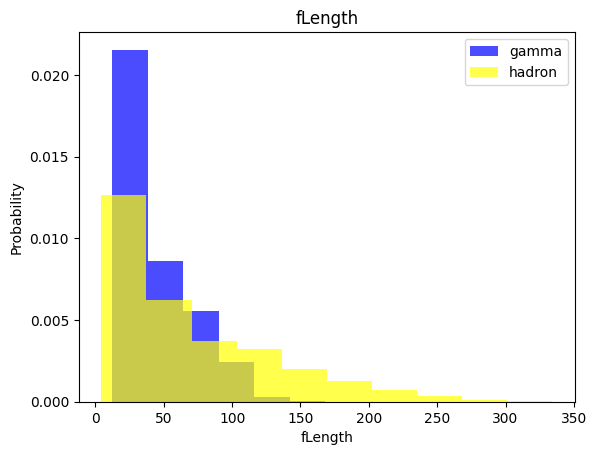

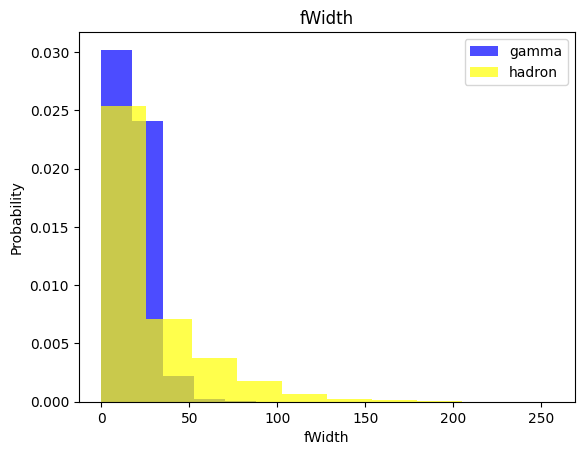

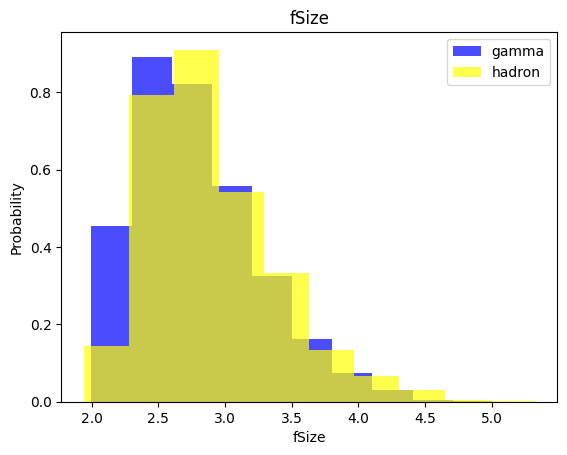

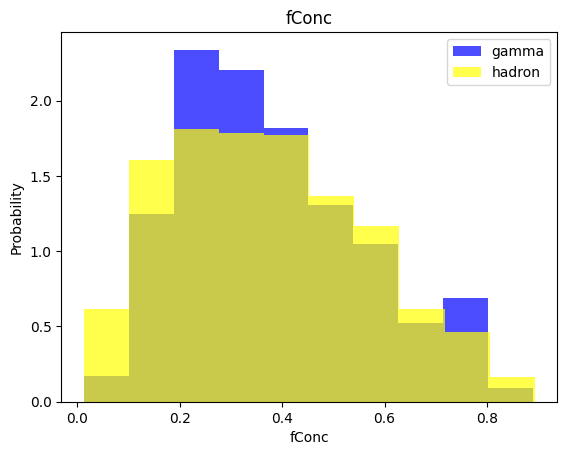

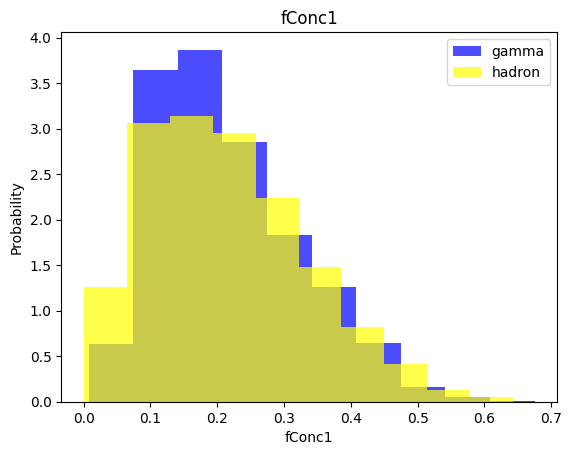

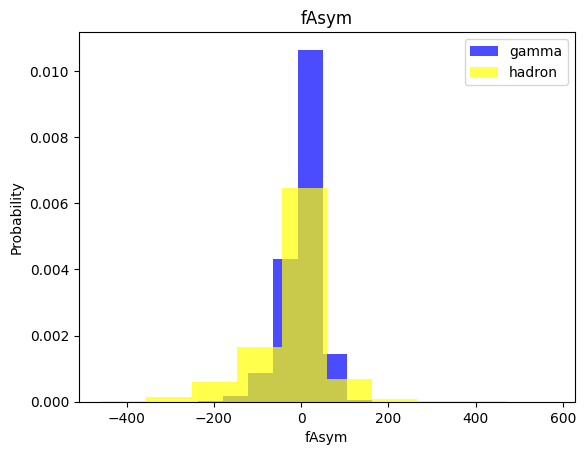

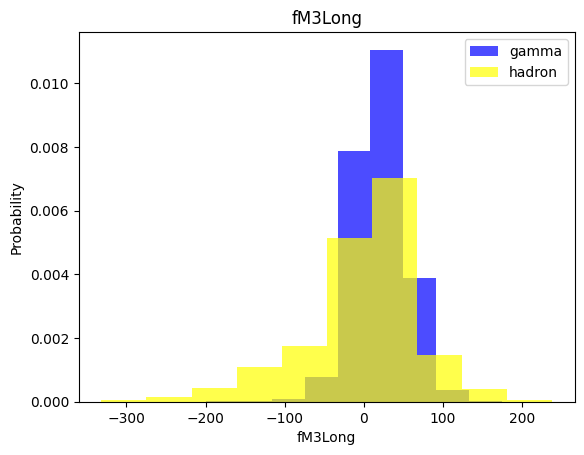

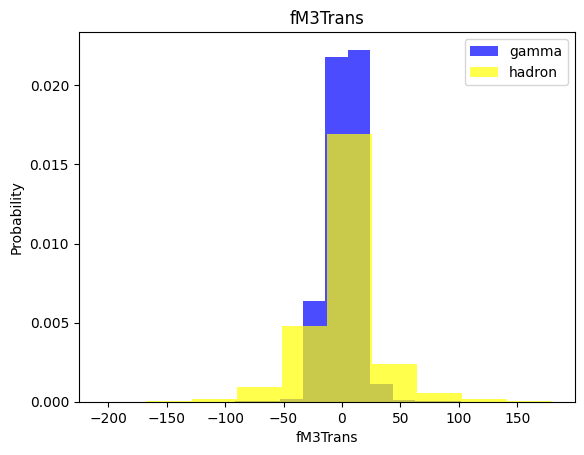

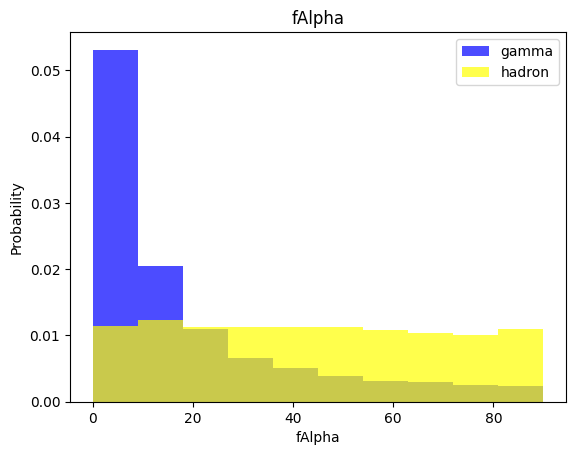

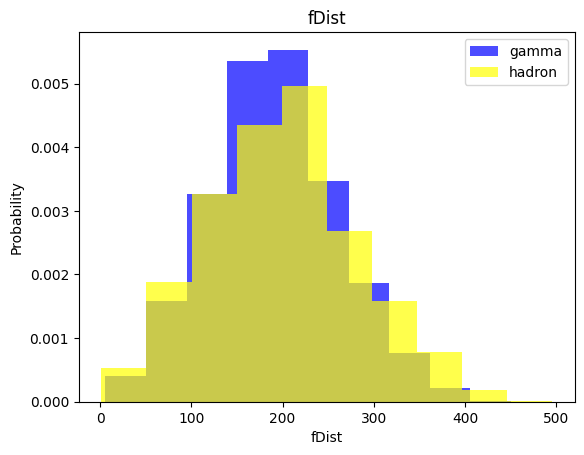

In [25]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True) 
    plt.hist(df[df['class'] == 0][label], color='yellow', label='hadron', alpha=0.7, density=True) 
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Train, Validation, Test datasets

In [69]:
train, valid, test = np.split(df.sample(frac=1), [int(0.5*len(df)), int(0.8*len(df))])

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [70]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [71]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

# KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [85]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [86]:
y_prediction = knn_model.predict(X_test)

In [87]:
y_prediction

array([1, 1, 1, ..., 0, 0, 0])

In [88]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2472
           1       0.79      0.78      0.79      2472

    accuracy                           0.79      4944
   macro avg       0.79      0.79      0.79      4944
weighted avg       0.79      0.79      0.79      4944



# Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB


In [90]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [91]:
y_predict = nb_model.predict(X_test)

In [93]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.40      0.53      2472
           1       0.60      0.90      0.72      2472

    accuracy                           0.65      4944
   macro avg       0.70      0.65      0.63      4944
weighted avg       0.70      0.65      0.63      4944



# Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_predict = lr_model.predict(X_test)

In [97]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      2472
           1       0.75      0.81      0.78      2472

    accuracy                           0.77      4944
   macro avg       0.78      0.77      0.77      4944
weighted avg       0.78      0.77      0.77      4944

